In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import git
from datetime import datetime
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

In [54]:
df_jhu = pd.read_csv(f"{homedir}/data/us/aggregate_jhu.csv")
df_berk = pd.read_csv(f"{homedir}/data/us/aggregate_berkeley.csv")

In [55]:
df_jhu.index

RangeIndex(start=0, stop=3273, step=1)

In [56]:
# Get rid of the aggregate country data
df_jhu = df_jhu.drop([0])
df_jhu['FIPS'] = df_jhu['FIPS'].map(lambda f : str(f))

In [57]:
def alter(fips):
    if len(fips) == 4:
        return '0' + fips
    return fips
df_jhu['FIPS'] = df_jhu['FIPS'].map(alter)
df_jhu = df_jhu.set_index('FIPS')
df_jhu.head()

,State,Area_Name,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2018,N_POP_CHG_2018,Births_2018,Deaths_2018,NATURAL_INC_2018,...,Surgery specialists (2019),Anesthesiology specialists (2019),Emergency Medicine specialists (2019),Radiology specialists (2019),Cardiology specialists (2019),Oncology (Cancer) specialists (2019),Endocrinology Diabetes and Metabolism specialists (2019),All Other Specialties specialists (2019),Total Specialist Physicians (2019),transit_scores - population weighted averages aggregated from town/city level to county
FIPS,,,,,,,,,,,,,,,,,,,,,
01000,AL,Alabama,NaN,NaN,NaN,4887871,12751.0,57216.0,53425.0,3791.0,...,754.000000,602.000000,465.000000,674.000000,410.000000,241.000000,71.000000,2619.000000,6342.000000,NaN
01001,AL,Autauga County,2.0,2.0,0.0,55601,158.0,655.0,532.0,123.0,...,8.576976,6.847931,5.289515,7.666952,4.663873,2.741447,0.807646,29.791911,72.142154,0.0
01003,AL,Baldwin County,3.0,2.0,5.0,218022,5403.0,2254.0,2228.0,26.0,...,33.631941,26.852027,20.741184,30.063565,18.287925,10.749732,3.166933,116.819699,282.882982,368329051.0
01005,AL,Barbour County,6.0,6.0,3.0,24881,-277.0,261.0,324.0,-63.0,...,3.838128,3.064394,2.367015,3.430899,2.087046,1.226776,0.361415,13.331641,32.283033,0.0
01007,AL,Bibb County,1.0,1.0,0.0,22400,-155.0,250.0,256.0,-6.0,...,3.455410,2.758829,2.130989,3.088789,1.878937,1.104448,0.325377,12.002281,29.063942,158361697.0


In [59]:
df_jhu['fips'] = df_jhu.index.map(lambda s : int(s))

In [60]:
df_jhu.head()

,State,Area_Name,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2018,N_POP_CHG_2018,Births_2018,Deaths_2018,NATURAL_INC_2018,...,Anesthesiology specialists (2019),Emergency Medicine specialists (2019),Radiology specialists (2019),Cardiology specialists (2019),Oncology (Cancer) specialists (2019),Endocrinology Diabetes and Metabolism specialists (2019),All Other Specialties specialists (2019),Total Specialist Physicians (2019),transit_scores - population weighted averages aggregated from town/city level to county,fips
FIPS,,,,,,,,,,,,,,,,,,,,,
01000,AL,Alabama,NaN,NaN,NaN,4887871,12751.0,57216.0,53425.0,3791.0,...,602.000000,465.000000,674.000000,410.000000,241.000000,71.000000,2619.000000,6342.000000,NaN,1000
01001,AL,Autauga County,2.0,2.0,0.0,55601,158.0,655.0,532.0,123.0,...,6.847931,5.289515,7.666952,4.663873,2.741447,0.807646,29.791911,72.142154,0.0,1001
01003,AL,Baldwin County,3.0,2.0,5.0,218022,5403.0,2254.0,2228.0,26.0,...,26.852027,20.741184,30.063565,18.287925,10.749732,3.166933,116.819699,282.882982,368329051.0,1003
01005,AL,Barbour County,6.0,6.0,3.0,24881,-277.0,261.0,324.0,-63.0,...,3.064394,2.367015,3.430899,2.087046,1.226776,0.361415,13.331641,32.283033,0.0,1005
01007,AL,Bibb County,1.0,1.0,0.0,22400,-155.0,250.0,256.0,-6.0,...,2.758829,2.130989,3.088789,1.878937,1.104448,0.325377,12.002281,29.063942,158361697.0,1007


/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


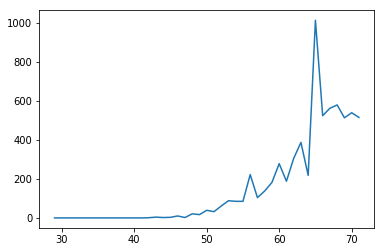

In [101]:
# Gets the number of deaths per day of a given county along with the time, counted in days
# since Jan 1st
def get_delta_deaths(fips):
    Y = pd.read_csv(f"{homedir}/data/us/covid/nyt_us_counties_daily.csv")
    Y_county = Y.loc[Y['fips'] == fips, :]
    start_date = '2020-01-01'
    Y_county['time'] =  Y_county['date'].map(lambda d : (get_date(d) - get_date('2020-02-01')).days)
    return (Y_county.time.values, Y_county.deaths.values)
def get_date(datestr):
    return datetime.strptime(datestr, '%Y-%m-%d')
X, y = get_delta_deaths(36061)
plt.plot(X, y)